In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json
import math

In [4]:
dataset = "superconduct"

{'1': [2, 0.5439574807143206], '2': [6, 0.6385768806974637], '3': [50, 0.6858133329098313], '4': [410, 0.7298399124400013], '5': [2544, 0.762448930123022], '6': [14646, 0.8063220655793365], '7': [71576, 0.8386556918665814], '8': [308622, 0.8621423604542439], '9': [1183427, 0.8819397940889941], '10': [4083523, 0.8956290935737592], '11': [12784812, 0.9043843550837264], '12': [35198139, 0.9108665057368501]}


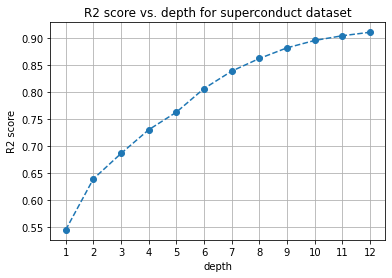

In [55]:
with open(f"../random_forest_builder/scores_{dataset}.json", "r") as f:
    data = json.loads(f.read())
    print(data)
x, y = [], []
for depth, [k, r2] in data.items():
    x.append(depth)
    y.append(r2)
fig, ax = plt.subplots()
ax.set_ylabel("R2 score")
ax.set_xlabel("depth")
ax.plot(x, y, "--o")
ax.xaxis.grid()
ax.yaxis.grid()
ax.set_title(f"R2 score vs. depth for {dataset} dataset")
plt.savefig(f"plots/{dataset}_R2", dpi=300)
plt.show()


In [16]:
n=40
no_trees=20

In [33]:
# Proximal method
result_cs = {}
for depth in range(2,5):
    result_cs[depth] = []
    for C in np.linspace(0.1, 1.4, 10):
        for lmda_i, lmda in enumerate(10 ** np.linspace(-5,2,8)):
            try:
                f =open(f"../results/cs/{dataset}_n={n}_no_trees={no_trees}_depth={depth}_C={C:.3}_lambda={lmda:.6}.json")
                data = json.loads(f.read())
                # print(data)
                result_cs[depth].append((data["measurements"], data["mse"]/data['true_fourier_norm_squared'], data["C"], data["lambda"], data["optimization_time"]))
            except:
                print(f"Couldn't find results/{dataset}_n={n}_no_trees={no_trees}_depth={depth}_C={C:.3}_lambda={lmda:.6}.json")

{'n': 40, 'no_trees': 20, 'depth': 2, 'C': 0.1, 'lambda': 1e-05, 'k': 6, 'sampling_time': 0.057585716247558594, 'optimization_time': 0.24843978881835938, 'equality': False, 'mse': 1396.0369898545903, 'true_fourier_norm_squared': 1398.858724321689, 'computed_fourier_norm_squared': 2.458206722049969, 'measurements': 6}
{'n': 40, 'no_trees': 20, 'depth': 2, 'C': 0.1, 'lambda': 0.0001, 'k': 6, 'sampling_time': 0.05781722068786621, 'optimization_time': 0.16988897323608398, 'equality': False, 'mse': 1392.0019422725265, 'true_fourier_norm_squared': 1398.858724321689, 'computed_fourier_norm_squared': 2.876529262685202, 'measurements': 6}
{'n': 40, 'no_trees': 20, 'depth': 2, 'C': 0.1, 'lambda': 0.001, 'k': 6, 'sampling_time': 0.07251930236816406, 'optimization_time': 0.05410146713256836, 'equality': False, 'mse': 1392.0010584692584, 'true_fourier_norm_squared': 1398.858724321689, 'computed_fourier_norm_squared': 2.878102373350917, 'measurements': 6}
{'n': 40, 'no_trees': 20, 'depth': 2, 'C': 0

depth 2
depth 3
depth 4


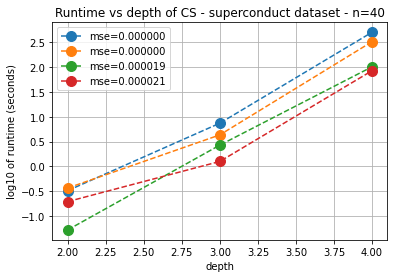

In [58]:
fig, ax = plt.subplots()
ax.set_ylabel("log10 of runtime (seconds)")
ax.set_xlabel("depth")
y1, y2, y3, y4 = [], [], [], []
x = [2,3,4]
for depth in range(2,5):
    print("depth", depth)
    for m, normalized_mse, C, lmbda, time in result_cs[depth]:
        if C==1.4 and lmbda ==0.001:
            y1.append(np.log10(time))
            y1_mse = normalized_mse
        if C==0.8222222222222221 and lmbda ==0.001:
            y2.append(np.log10(time))
            y2_mse = normalized_mse
        if C==1.4 and lmbda ==0.01:
            y3.append(np.log10(time))
            y3_mse = normalized_mse
        if C==0.8222222222222221 and lmbda ==0.01:
            y4.append(np.log10(time))
            y4_mse = normalized_mse
ax.plot(x, y1,'--o', markersize=10, label=f"mse={y1_mse:.6f}")
ax.plot(x, y2,'--o', markersize=10, label=f"mse={y2_mse:.6f}")
ax.plot(x, y3,'--o', markersize=10, label=f"mse={y3_mse:.6f}")
ax.plot(x, y4,'--o', markersize=10, label=f"mse={y4_mse:.6f}")

ax.xaxis.grid()
ax.yaxis.grid()
ax.legend()
ax.set_title(f"Runtime vs depth of CS - {dataset} dataset - n=40")
plt.savefig(f"plots/{dataset}_cs_runtimes", dpi=300)
plt.show()


In [61]:
n=324
no_trees=20

In [142]:
# Reed-solomon method examination
result_reed_solomon = {}
for depth in [4]:
    print("depth=", depth)
    result_reed_solomon[depth] = []
    for C in [0.05, 0.1 , 0.15, 0.2 , 0.4]:
        for ratio in [1.1, 2.6, 5.0]:
            try:
                f =open(f"../results/reed_solomon/{dataset}_n={n}_no_trees={no_trees}_depth={depth}_C={C:.3}_ratio={ratio:.3}.json")
                data = json.loads(f.read())
                # print(data)
                normalized_mse = data["mse"]/data['true_fourier_norm_squared']
                if normalized_mse < 0.1:
                    print(data["C"], data["ratio"], normalized_mse, data["measurements"])
                result_reed_solomon[depth].append((data["measurements"], data["mse"]/data['true_fourier_norm_squared'],  data["C"], data["ratio"],  data["time_cached"]))
            except:
                print(f"Could not find {dataset}_n={n}_no_trees={no_trees}_depth={depth}_C={C:.3}_ratio={ratio:.3}.json")

depth= 4
0.05 1.1 0.03498509463440521 6240
0.05 2.6 0.03632771601246781 2600
0.1 1.1 0.01418677532048383 12480
0.1 2.6 0.03388498457675082 5200
0.1 5.0 0.04249799618407694 4160
0.15 1.1 0.01418677532048383 12480
0.15 2.6 0.034347022855248814 7280
0.15 5.0 0.04249799618407694 4160
0.2 1.1 0.0030063347531979704 24960
0.2 2.6 0.016044024263654668 11440
0.2 5.0 0.016616948065082966 8320
0.4 1.1 0.00018081285854965105 49920
0.4 2.6 0.004329267252179597 22880
0.4 5.0 0.004374575442363251 20800


In [144]:
# Reed solomon one more time after examination
C_ratio_list = [(0.05, 2.6)]
result_reed_solomon = {}
for depth in [4]:
    result_reed_solomon[depth] = []
    for C, ratio in C_ratio_list:
        try:
            f =open(f"../results/reed_solomon/{dataset}_n={n}_no_trees={no_trees}_depth={depth}_C={C:.3}_ratio={ratio:.3}.json")
            data = json.loads(f.read())
            normalized_mse = data["mse"]/data['true_fourier_norm_squared']
            print(data["C"], data["ratio"], data["mse"], normalized_mse, data["measurements"])
            result_reed_solomon[depth].append((data["measurements"], data["mse"],  data["C"], data["ratio"],  data["time_cached"]))
        except:
            print(f"Could not find {dataset}_n={n}_no_trees={no_trees}_depth={depth}_C={C:.3}_ratio={ratio:.3}.json")

0.05 2.6 50.452352915014835 0.03632771601246781 2600


In [145]:
# Binning method
from math import ceil
result_binning = {}
for depth in [4]:
    print("depth=", depth)
    result_binning[depth] = []
    for C, ratio in C_ratio_list:
            # Iterations over the frequency recovery primitive
            cs_bins_range = np.linspace(0.2 * depth ** 2 , depth ** 2, 10)
            cs_bins_range = [ceil(a) for a in cs_bins_range]
            for cs_bins in cs_bins_range:
                for cs_iterations in [1, 2, 3]:
                    for cs_ratio in [1.1, 1.3, 1.5, 1.9, 2.1, 3.0]:
                        try:
                            f =open(f"../results/binning/{dataset}_n={n}_no_trees={no_trees}_depth={depth}_"
                                    f"C={C:.3}_ratio={ratio:.3}_csbins={cs_bins}_csiterations={cs_iterations}_"
                                    f"csratio={cs_ratio}.json")
                            data = json.loads(f.read())
                            #print(data)
                            result_binning[depth].append((data["measurements"], data["mse"]))
                        except:
                            print(f"Could not find {dataset}_n={n}_no_trees={no_trees}_depth={depth}_"
                                    f"C={C:.3}_ratio={ratio:.3}_csbins={cs_bins}_csiterations={cs_iterations}_"
                                    f"csratio={cs_ratio}.json")

depth= 4
Could not find superconduct_n=324_no_trees=20_depth=4_C=0.05_ratio=2.6_csbins=4_csiterations=3_csratio=2.1.json
Could not find superconduct_n=324_no_trees=20_depth=4_C=0.05_ratio=2.6_csbins=4_csiterations=3_csratio=3.0.json
Could not find superconduct_n=324_no_trees=20_depth=4_C=0.05_ratio=2.6_csbins=5_csiterations=3_csratio=2.1.json
Could not find superconduct_n=324_no_trees=20_depth=4_C=0.05_ratio=2.6_csbins=5_csiterations=3_csratio=3.0.json
Could not find superconduct_n=324_no_trees=20_depth=4_C=0.05_ratio=2.6_csbins=7_csiterations=3_csratio=3.0.json
Could not find superconduct_n=324_no_trees=20_depth=4_C=0.05_ratio=2.6_csbins=8_csiterations=3_csratio=3.0.json


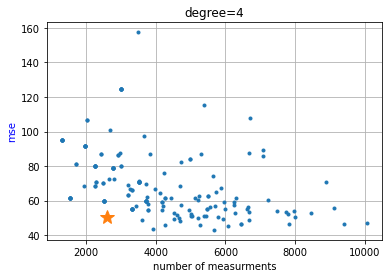

In [146]:
for depth in [4]:
    fig, ax = plt.subplots()
    ax.set_ylabel("mse", color="blue")
    ax.set_xlabel("number of measurments")
    ax.plot([a[0] for a in result_binning[depth]],[a[1] for a in result_binning[depth]],'.')
    ax.plot([a[0] for a in result_reed_solomon[depth]],[a[1] for a in result_reed_solomon[depth]],'*', markersize=15)
    ax.xaxis.grid()
    ax.yaxis.grid()
    ax.set_title(f"degree={depth}")
    #plt.savefig(f"images/random/n={n}_d={degree}", dpi=300)
    plt.show()

In [158]:
# Random measurement method
from math import ceil
result_random = {}
for depth in [4]:
    result_random[depth] = []
    for C, ratio in C_ratio_list:
        for sampling_factor in np.linspace(0.2,1.4,10):
            try:
                dir_string= f"../results/random_parallel/{dataset}_n={n}_no_trees={no_trees}_depth={depth}_C={C:.3}_ratio={ratio:.3}_samplefactor={sampling_factor:.3}.json"
                f =open(dir_string)
                data = json.loads(f.read())
                print(data["mse"])
                result_random[depth].append((data["measurements"], data["mse"]))
            except:
                print(f" Couldn't find {dir_string}")

 Couldn't find ../results/random_parallel/superconduct_n=324_no_trees=20_depth=4_C=0.05_ratio=2.6_samplefactor=0.2.json
 Couldn't find ../results/random_parallel/superconduct_n=324_no_trees=20_depth=4_C=0.05_ratio=2.6_samplefactor=0.333.json
 Couldn't find ../results/random_parallel/superconduct_n=324_no_trees=20_depth=4_C=0.05_ratio=2.6_samplefactor=0.467.json
 Couldn't find ../results/random_parallel/superconduct_n=324_no_trees=20_depth=4_C=0.05_ratio=2.6_samplefactor=0.6.json
 Couldn't find ../results/random_parallel/superconduct_n=324_no_trees=20_depth=4_C=0.05_ratio=2.6_samplefactor=0.733.json
 Couldn't find ../results/random_parallel/superconduct_n=324_no_trees=20_depth=4_C=0.05_ratio=2.6_samplefactor=0.867.json
 Couldn't find ../results/random_parallel/superconduct_n=324_no_trees=20_depth=4_C=0.05_ratio=2.6_samplefactor=1.0.json
 Couldn't find ../results/random_parallel/superconduct_n=324_no_trees=20_depth=4_C=0.05_ratio=2.6_samplefactor=1.13.json
 Couldn't find ../results/rando

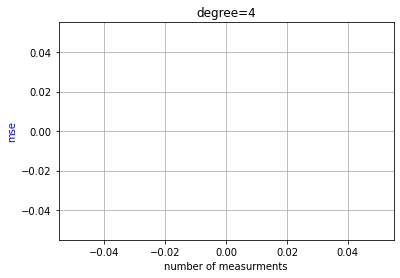

In [155]:
for depth in [4]:
    fig, ax = plt.subplots()
    ax.set_ylabel("mse", color="blue")
    ax.set_xlabel("number of measurments")
    #ax.plot([a[0] for a in result_binning[depth]],[a[1] for a in result_binning[depth]],'b.')
    ax.plot([a[0] for a in result_random[depth]],[a[1] for a in result_random[depth]],'r.')
    ax.xaxis.grid()
    ax.yaxis.grid()
    ax.set_title(f"degree={depth}")
    #plt.savefig(f"images/random/n={n}_d={degree}", dpi=300)
    plt.show()